hous prices : Advanced Regression
 by walled hany 


In [1]:
import sklearn.utils

def tosequence(x):
    if isinstance(x, (list, tuple)):
        return x
    return list(x)

# Monkeypatch it into sklearn.utils
sklearn.utils.tosequence = tosequence


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
import sklearn_pandas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_df=pd.read_csv(r'C:\Users\nursi\Downloads\new\train.csv')
test_df=pd.read_csv(r'C:\Users\nursi\Downloads\new\test.csv')

In [5]:
data_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
all_data=pd.concat((data_df,test_df))

In [8]:

all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [10]:
colum_missing=[col for col in all_data.columns if all_data[col].isnull().any() ]

In [11]:
colum_missing

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [12]:

all_data[all_data.isna().any(axis=1)]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [13]:
data_df['SalePrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [14]:
data_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='SalePrice'>

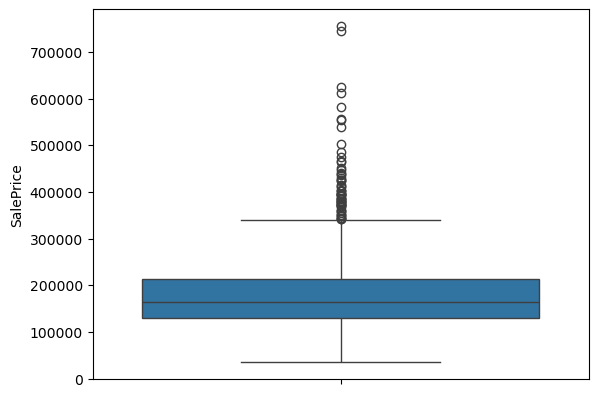

In [15]:
sns.boxplot(data_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

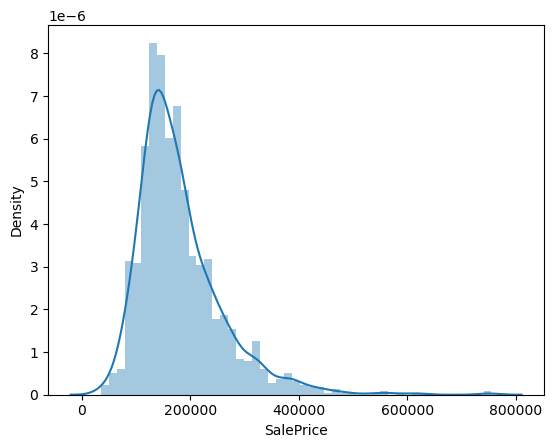

In [16]:
sns.distplot(data_df['SalePrice'])

In [17]:
data_df['SalePrice'].skew() ##skew is very high >1 to rigth

np.float64(1.8828757597682129)

In [18]:
data_df['SalePrice']=np.log1p(data_df['SalePrice'])

In [19]:
data_df['SalePrice'].skew() ## now  is ver low

np.float64(0.12134661989685333)

<Axes: xlabel='SalePrice', ylabel='Density'>

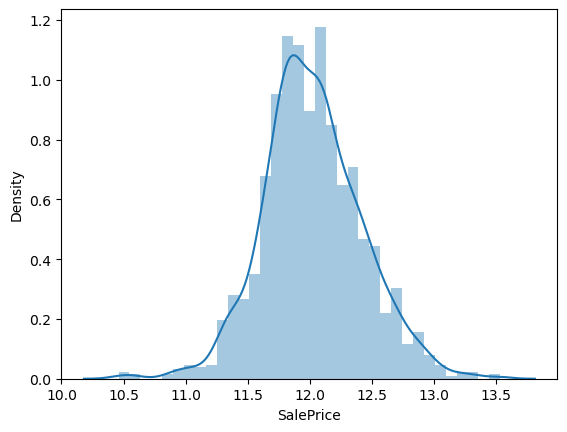

In [20]:
sns.distplot(data_df['SalePrice'])

In [21]:
y_train=data_df['SalePrice']
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [22]:
print('w')

w


chek thecloum with nan values


<Axes: >

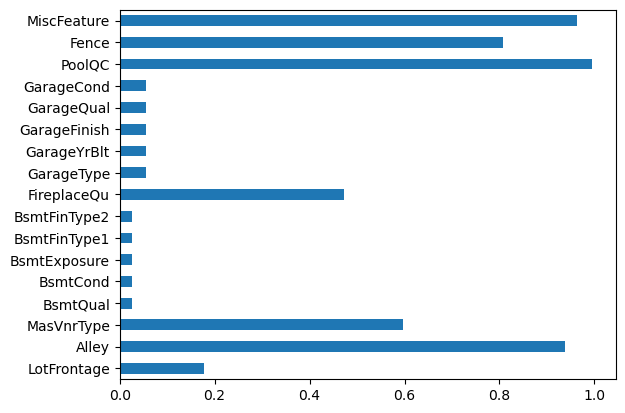

In [23]:
col_nan=data_df.isna().sum()/data_df.shape[0]
col_nan[col_nan>0.01].plot(kind='barh')

In [24]:
data_df['MiscFeature'].value_counts(dropna=False)

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [25]:
##dropingcolums id 


In [26]:
data_df=data_df.drop('Id',axis=1)
test_df=test_df.drop('Id',axis=1)

In [27]:
data_df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [28]:
data_df['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [29]:
data_df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [30]:
data_df = data_df.drop(["Street", "Utilities"], axis=1)
test_df = test_df.drop(["Street", "Utilities"], axis=1)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

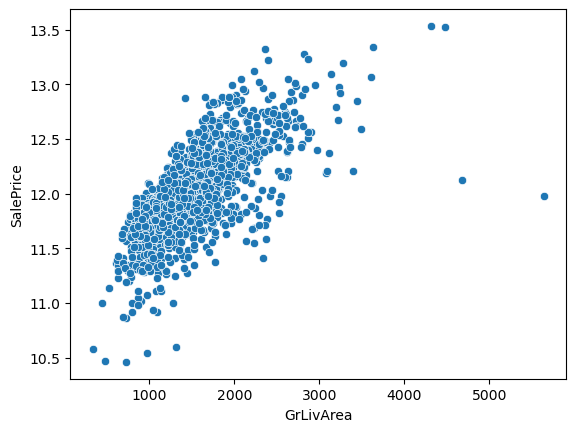

In [31]:
sns.scatterplot(x=data_df["GrLivArea"], y=data_df["SalePrice"])

In [32]:
clear_data=data_df.drop(data_df[(data_df['GrLivArea']>4500)].index)
clear_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,Reg,Lvl,Inside,Gtl,Gilbert,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,NaN,Reg,Lvl,Inside,Gtl,NWAmes,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,NaN,Reg,Lvl,Inside,Gtl,Crawfor,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,NaN,Reg,Lvl,Inside,Gtl,NAmes,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

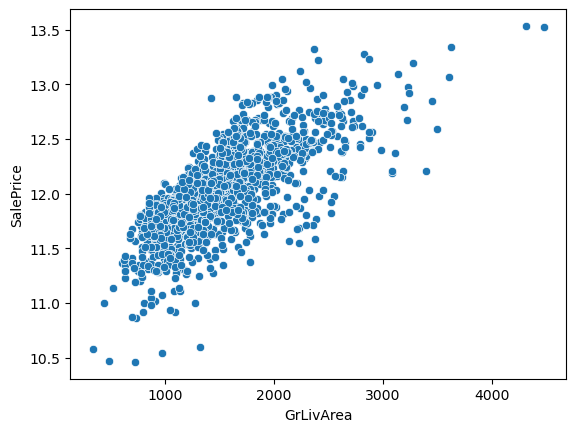

In [33]:
sns.scatterplot(x=clear_data["GrLivArea"], y=data_df["SalePrice"])

In [34]:

train_=clear_data.drop(['SalePrice'], axis=1)
all_data = pd.concat([data_df, test_df]).reset_index(drop=True)                      

In [35]:
data_df[(data_df['GrLivArea']>4500)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,NaN,IR1,Bnk,Inside,Gtl,Edwards,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
1298,60,RL,313.0,63887,NaN,IR3,Bnk,Corner,Gtl,Edwards,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935


In [36]:
 all_data[all_data.YearBuilt > 2017]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [37]:
all_data[all_data.GarageYrBlt > 2017].GarageYrBlt

2592    2207.0
Name: GarageYrBlt, dtype: float64

In [38]:
all_data.loc[2590, 'GarageYrBlt'] = 2007

In [39]:
all_data['Neighborhood'].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

In [40]:
all_data['Neighborhood'].info

<bound method Series.info of 0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
2914    MeadowV
2915    MeadowV
2916    Mitchel
2917    Mitchel
2918    Mitchel
Name: Neighborhood, Length: 2919, dtype: object>

In [41]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [42]:
neigh_lot_frontage=all_data[all_data.GarageYrBlt > 2017].GarageYrBlt

In [43]:
neigh_lot_frontage=all_data.groupby('Neighborhood')['LotFrontage'].agg(['mean','median'])

In [44]:
neigh_lot_frontage['avg_mean_median']=(neigh_lot_frontage['mean']+neigh_lot_frontage['median'])

In [45]:
neigh_lot_frontage

,mean,median,avg_mean_median
Neighborhood,,,
Blmngtn,46.900000,43.0,89.900000
Blueste,27.300000,24.0,51.300000
BrDale,21.500000,21.0,42.500000
BrkSide,55.789474,51.0,106.789474
ClearCr,88.150000,80.5,168.650000
CollgCr,71.336364,70.0,141.336364
Crawfor,69.951807,70.0,139.951807
Edwards,66.910112,65.0,131.910112
Gilbert,74.207207,64.0,138.207207


In [46]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,NaN,Reg,Lvl,Inside,Gtl,MeadowV,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,NaN,Reg,Lvl,Inside,Gtl,MeadowV,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,NaN,Reg,Lvl,Inside,Gtl,Mitchel,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [47]:
data_df['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [48]:
all_data[all_data['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,NaN,IR1,Lvl,Corner,Gtl,NWAmes,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,12.206078
12,20,RL,NaN,12968,NaN,IR2,Lvl,Inside,Gtl,Sawyer,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,11.877576
14,20,RL,NaN,10920,NaN,IR1,Lvl,Corner,Gtl,NAmes,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,11.964007
16,20,RL,NaN,11241,NaN,IR1,Lvl,CulDSac,Gtl,NAmes,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,11.911708
24,20,RL,NaN,8246,NaN,IR1,Lvl,Inside,Gtl,Sawyer,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,11.944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,20,RL,NaN,11088,NaN,Reg,Lvl,Corner,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2850,60,RL,NaN,21533,NaN,IR2,Lvl,FR2,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN
2900,20,RL,NaN,50102,NaN,IR1,Low,Inside,Mod,Timber,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN
2901,20,RL,NaN,8098,NaN,IR1,Lvl,Inside,Gtl,Timber,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [49]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [50]:
all_data['LotFrontage'].isna().sum().sum()

np.int64(0)

convet some numerical tocategorical 

In [51]:
def conver_to_string(df,columns):
    df[columns]=df[columns].astype(str)
    return df

In [52]:
all_data['OverallCond']

0       5
1       8
2       5
3       5
4       5
       ..
2914    7
2915    5
2916    7
2917    5
2918    5
Name: OverallCond, Length: 2919, dtype: int64

In [53]:
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)

In [54]:
all_data['OverallCond']=all_data['OverallCond'].astype(str)

replacing missing values int the rest values

In [55]:
num_features=all_data.select_dtypes(include=['int64','float64']).columns

In [56]:
num_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [57]:
all_data['BsmtFinSF1']

0        706.0
1        978.0
2        486.0
3        216.0
4        655.0
         ...  
2914       0.0
2915     252.0
2916    1224.0
2917     337.0
2918     758.0
Name: BsmtFinSF1, Length: 2919, dtype: float64

In [58]:
num_features_to_constant=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"] 

In [59]:
num_features_to_constant

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

num_features_to_constant convert  missing value to0


In [60]:
num_features_to_median=[s for s in num_features if s  not in  num_features_to_constant+['SalePrice']]

In [61]:
num_features_to_median

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
numeric_features_median=SimpleImputer(strategy='mean')
numeric_features_zero=SimpleImputer(strategy='constant',fill_value=0)
preprocessor=ColumnTransformer(transformers=[ ('median',numeric_features_median,num_features_to_median),('zero',numeric_features_zero,num_features_to_constant)])
all_data_1=preprocessor.fit_transform(all_data)
all_data_1=pd.DataFrame(all_data_1,index=all_data.index,columns=list(num_features_to_median) + list(num_features_to_constant))


In [63]:
all_data_1

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,MasVnrArea
0,65.0,8450.0,7.0,2003.0,2003.0,150.0,856.0,856.0,854.0,0.0,...,0.0,0.0,0.0,2.0,2008.0,706.0,0.0,1.0,0.0,196.0
1,80.0,9600.0,6.0,1976.0,1976.0,284.0,1262.0,1262.0,0.0,0.0,...,0.0,0.0,0.0,5.0,2007.0,978.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,434.0,920.0,920.0,866.0,0.0,...,0.0,0.0,0.0,9.0,2008.0,486.0,0.0,1.0,0.0,162.0
3,60.0,9550.0,7.0,1915.0,1970.0,540.0,756.0,961.0,756.0,0.0,...,0.0,0.0,0.0,2.0,2006.0,216.0,0.0,1.0,0.0,0.0
4,84.0,14260.0,8.0,2000.0,2000.0,490.0,1145.0,1145.0,1053.0,0.0,...,0.0,0.0,0.0,12.0,2008.0,655.0,0.0,1.0,0.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,4.0,1970.0,1970.0,546.0,546.0,546.0,546.0,0.0,...,0.0,0.0,0.0,6.0,2006.0,0.0,0.0,0.0,0.0,0.0
2915,21.0,1894.0,4.0,1970.0,1970.0,294.0,546.0,546.0,546.0,0.0,...,0.0,0.0,0.0,4.0,2006.0,252.0,0.0,0.0,0.0,0.0
2916,160.0,20000.0,5.0,1960.0,1996.0,0.0,1224.0,1224.0,0.0,0.0,...,0.0,0.0,0.0,9.0,2006.0,1224.0,0.0,1.0,0.0,0.0
2917,62.0,10441.0,5.0,1992.0,1992.0,575.0,912.0,970.0,0.0,0.0,...,0.0,0.0,700.0,7.0,2006.0,337.0,0.0,0.0,1.0,0.0


In [64]:
all_data['LotArea'].isna().sum()

np.int64(0)

In [65]:
num_features_to_median

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

convert Categorical  to numerl


In [66]:
ctgeros=all_data.select_dtypes(include=['object']).columns

In [67]:
all_data['Alley'].isna().count()

np.int64(2919)

In [68]:
impute_dict = {
    # Presence/absence → None
    "Alley": "None",
    "MasVnrType": "None",
    "BsmtQual": "None",
    "BsmtCond": "None",
    "BsmtExposure": "None",
    "BsmtFinType1": "None",
    "BsmtFinType2": "None",
    "FireplaceQu": "None",
    "GarageType": "None",
    "GarageFinish": "None",
    "GarageQual": "None",
    "GarageCond": "None",
    "PoolQC": "None",
    "Fence": "None",
    "MiscFeature": "None",

    # Categorical → Mode (الأكثر شيوعًا)
    "MSSubClass": "mode",
    "MSZoning": "mode",
    "LotShape": "mode",
    "LandContour": "mode",
    "LotConfig": "mode",
    "LandSlope": "mode",
    "Neighborhood": "mode",
    "Condition1": "mode",
    "Condition2": "mode",
    "BldgType": "mode",
    "HouseStyle": "mode",
    "OverallCond": "mode",
    "RoofStyle": "mode",
    "RoofMatl": "mode",
    "Exterior1st": "mode",
    "Exterior2nd": "mode",
    "ExterQual": "mode",
    "ExterCond": "mode",
    "Foundation": "mode",
    "Heating": "mode",
    "HeatingQC": "mode",
    "CentralAir": "mode",
    "Electrical": "mode",
    "KitchenQual": "mode",
    "Functional": "mode",
    "PavedDrive": "mode",
    "SaleType": "mode",
    "SaleCondition": "mode"
}


فصل الاعمدة حسب التعويض

In [69]:
none_cols=[col for col ,value in  impute_dict.items() if value=='None'and col in ctgeros ] 
mode_col=[col for col ,value in impute_dict.items() if value=='mode'and col in ctgeros]

In [70]:
none_col=SimpleImputer(strategy='constant',fill_value='None')
mode_imputer=SimpleImputer(strategy='most_frequent')
columnstransform=ColumnTransformer(
    transformers=[
        ('none',none_col,none_cols),
        ('mode',mode_imputer,mode_col)
    ]
)
## تحويل كامل
cat_piepline=Pipeline([
    ('imputer',columnstransform)
])
colums_transforms=cat_piepline.fit_transform(all_data)
catriogsf_data=pd.DataFrame(colums_transforms,index=all_data.index,columns=none_cols+mode_col)
all_data[none_cols+mode_col]=catriogsf_data

In [71]:
all_data['Alley'].isna().sum()

np.int64(0)

In [72]:
catriogsf_data.isna().sum()

Alley            0
MasVnrType       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PoolQC           0
Fence            0
MiscFeature      0
MSSubClass       0
MSZoning         0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

transforouresrmation  for skewe featuers

In [73]:
all_data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Alley               0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 78, dtype: int64

show the skew data

In [150]:

numeric_features=[feat for feat in num_features if feat not in ['SalePrice'] ]
numeric_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [75]:
skewed_features=all_data[numeric_features].apply(lambda x:x.dropna().skew())
skewed_features=skewed_features[skewed_features >0.5].index
print("\nHighly skewed features: \n\n{}".format(skewed_features.tolist()))


Highly skewed features: 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [76]:
all_data[skewed_features] = np.log1p(all_data[skewed_features])
test_df[skewed_features] = np.log1p(test_df[skewed_features])

I tried two method : Log-transformation and BoxCox transformation. As Box-Cox gave me little better results I decided to use it finally.

In [77]:
lambda_=0.15
for feature in skewed_features:
    all_data[feature]=boxcox1p(all_data[feature],lambda_)

In [78]:
all_data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
2914    MeadowV
2915    MeadowV
2916    Mitchel
2917    Mitchel
2918    Mitchel
Name: Neighborhood, Length: 2919, dtype: object

<Axes: >

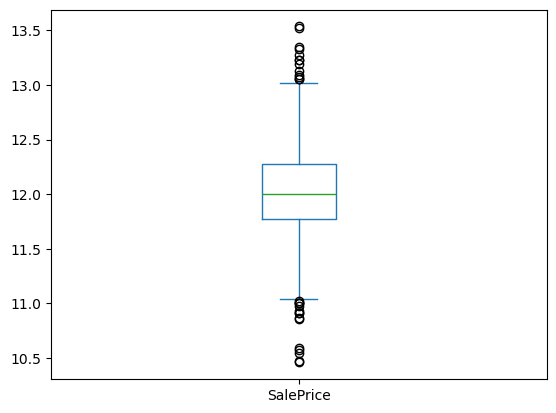

In [149]:
all_data["SalePrice"].plot(kind="box")

In [79]:

all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
    

In [80]:

import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn_pandas import DataFrameMapper


class OrderedLabelTransformer(BaseEstimator, TransformerMixin):
    # القاموس الرئيسي لجميع القيم الممكنة
    base_dict = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4, "NA": -1}

    def fit(self, X, y=None):
        # استخدام فقط القيم الموجودة في العمود
        self.orderDict = self.base_dict.copy()
        return self

    def transform(self, X):
        # تعيين -1 للقيم غير موجودة أو NaN
        return np.array([self.orderDict.get(n, -1) for n in X])


class NeighborhoodTransformer(BaseEstimator, TransformerMixin):
    neighborhoodsmap = {
        'StoneBr': 2, 'NridgHt': 2, 'NoRidge': 2, 
        'MeadowV': 0, 'IDOTRR': 0, 'BrDale': 0,
        'CollgCr': 1, 'Veenker': 1, 'Crawfor': 1,
            'Mitchel': 1, 'Somerst': 1, 'NWAmes': 1,
        'OldTown': 1, 'BrkSide': 1, 'Sawyer': 1,
        'NAmes': 1, 'SawyerW': 1, 'Edwards': 1,
        'Timber': 1, 'Gilbert': 1, 'ClearCr': 1,
        'NPkVill': 1, 'Blmngtn': 1, 'SWISU': 1,
        'Blueste': 1
    }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.neighborhoodsmap.get(n, -1) for n in X])


order_feats = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual", 
               "BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond"]

# حفظ نسخة أصلية إذا أردنا عمل One-Hot Encoding لاحقًا
original_features_df = all_data[order_feats + ['Neighborhood']]


order_features = [(feat, OrderedLabelTransformer()) for feat in order_feats]
neighb_features = [("Neighborhood", NeighborhoodTransformer())]


label_encoder = DataFrameMapper(neighb_features + order_features)

# ترتيب الأعمدة بعد التحويل
cols = ["Neighborhood"] + order_feats


transformed_feats = label_encoder.fit_transform(all_data)
transformed_df = pd.DataFrame(transformed_feats, index=all_data.index, columns=cols)


transformed_df.head()


,Neighborhood,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond
0,1,3,2,4,3,3,2,-1,2,2
1,1,2,2,4,2,3,2,2,2,2
2,1,3,2,4,3,3,2,2,2,2
3,1,2,2,3,3,2,3,3,2,2
4,2,3,2,4,3,3,2,2,2,2


In [81]:
transformed_df.shape

(2919, 10)

In [82]:
original_features_df

,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond,Neighborhood
0,Gd,TA,Ex,Gd,Gd,TA,None,TA,TA,CollgCr
1,TA,TA,Ex,TA,Gd,TA,TA,TA,TA,Veenker
2,Gd,TA,Ex,Gd,Gd,TA,TA,TA,TA,CollgCr
3,TA,TA,Gd,Gd,TA,Gd,Gd,TA,TA,Crawfor
4,Gd,TA,Ex,Gd,Gd,TA,TA,TA,TA,NoRidge
...,...,...,...,...,...,...,...,...,...,...
2914,TA,TA,Gd,TA,TA,TA,None,None,None,MeadowV
2915,TA,TA,TA,TA,TA,TA,None,TA,TA,MeadowV
2916,TA,TA,Ex,TA,TA,TA,TA,TA,TA,Mitchel
2917,TA,TA,TA,TA,Gd,TA,None,None,None,Mitchel


In [83]:
all_data_1

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,MasVnrArea
0,65.0,8450.0,7.0,2003.0,2003.0,150.0,856.0,856.0,854.0,0.0,...,0.0,0.0,0.0,2.0,2008.0,706.0,0.0,1.0,0.0,196.0
1,80.0,9600.0,6.0,1976.0,1976.0,284.0,1262.0,1262.0,0.0,0.0,...,0.0,0.0,0.0,5.0,2007.0,978.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,434.0,920.0,920.0,866.0,0.0,...,0.0,0.0,0.0,9.0,2008.0,486.0,0.0,1.0,0.0,162.0
3,60.0,9550.0,7.0,1915.0,1970.0,540.0,756.0,961.0,756.0,0.0,...,0.0,0.0,0.0,2.0,2006.0,216.0,0.0,1.0,0.0,0.0
4,84.0,14260.0,8.0,2000.0,2000.0,490.0,1145.0,1145.0,1053.0,0.0,...,0.0,0.0,0.0,12.0,2008.0,655.0,0.0,1.0,0.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,4.0,1970.0,1970.0,546.0,546.0,546.0,546.0,0.0,...,0.0,0.0,0.0,6.0,2006.0,0.0,0.0,0.0,0.0,0.0
2915,21.0,1894.0,4.0,1970.0,1970.0,294.0,546.0,546.0,546.0,0.0,...,0.0,0.0,0.0,4.0,2006.0,252.0,0.0,0.0,0.0,0.0
2916,160.0,20000.0,5.0,1960.0,1996.0,0.0,1224.0,1224.0,0.0,0.0,...,0.0,0.0,0.0,9.0,2006.0,1224.0,0.0,1.0,0.0,0.0
2917,62.0,10441.0,5.0,1992.0,1992.0,575.0,912.0,970.0,0.0,0.0,...,0.0,0.0,700.0,7.0,2006.0,337.0,0.0,0.0,1.0,0.0


In [84]:
rest_featues=set(pd.concat([ all_data_1,original_features_df],axis=1).columns).symmetric_difference(set(all_data.columns))
rest_features_df=all_data[list(rest_featues)]

In [85]:
rest_features_df

,PoolQC,Alley,Foundation,Heating,HouseStyle,RoofStyle,Condition2,SaleType,OverallCond,MiscFeature,...,BsmtFinType2,BsmtFinType1,PavedDrive,MSSubClass,Exterior1st,Fence,LandContour,Electrical,GarageFinish,BldgType
0,None,None,PConc,GasA,2Story,Gable,Norm,WD,5,None,...,Unf,GLQ,Y,60,VinylSd,None,Lvl,SBrkr,RFn,1Fam
1,None,None,CBlock,GasA,1Story,Gable,Norm,WD,8,None,...,Unf,ALQ,Y,20,MetalSd,None,Lvl,SBrkr,RFn,1Fam
2,None,None,PConc,GasA,2Story,Gable,Norm,WD,5,None,...,Unf,GLQ,Y,60,VinylSd,None,Lvl,SBrkr,RFn,1Fam
3,None,None,BrkTil,GasA,2Story,Gable,Norm,WD,5,None,...,Unf,ALQ,Y,70,Wd Sdng,None,Lvl,SBrkr,Unf,1Fam
4,None,None,PConc,GasA,2Story,Gable,Norm,WD,5,None,...,Unf,GLQ,Y,60,VinylSd,None,Lvl,SBrkr,RFn,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,None,None,CBlock,GasA,2Story,Gable,Norm,WD,7,None,...,Unf,Unf,Y,160,CemntBd,None,Lvl,SBrkr,None,Twnhs
2915,None,None,CBlock,GasA,2Story,Gable,Norm,WD,5,None,...,Unf,Rec,Y,160,CemntBd,None,Lvl,SBrkr,Unf,TwnhsE
2916,None,None,CBlock,GasA,1Story,Gable,Norm,WD,7,None,...,Unf,ALQ,Y,20,VinylSd,None,Lvl,SBrkr,Unf,1Fam
2917,None,None,PConc,GasA,SFoyer,Gable,Norm,WD,5,Shed,...,Unf,GLQ,Y,85,HdBoard,MnPrv,Lvl,SBrkr,None,1Fam


In [86]:
# Total Squere Feet for house
all_data["TotalSqrtFeet"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
# test_df["TotalSqrtFeet"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

# Total number of bathrooms
all_data["TotalBaths"] = all_data["BsmtFullBath"] + (all_data["BsmtHalfBath"]  * .5) + all_data["FullBath"] + (all_data["HalfBath"]* .5)
# test_df["TotalBaths"] = test_df["BsmtFullBath"] + (test_df["BsmtHalfBath"]  * .5) + test_df["FullBath"] + (test_df["HalfBath"]* .5)

 Feature Engineering

add some Feature form  model is very useful

In [87]:
all_data['Isgarage'] =all_data['GarageArea'].apply(lambda x:1 if x>0 else 0)

all_data['Isfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


all_data['Ispool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


all_data['Issecondfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)


all_data['IsOpenPorch'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)


all_data['IsWoodDeck'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [88]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SaleCondition,SalePrice,TotalSqrtFeet,TotalBaths,Isgarage,Isfireplace,Ispool,Issecondfloor,IsOpenPorch,IsWoodDeck
0,60,RL,1.867861,2.756178,None,Reg,Lvl,Inside,Gtl,CollgCr,...,Normal,12.247699,4.912095,2.821917,1,0,0,1,1,0
1,20,RL,1.917553,2.774039,None,Reg,Lvl,FR2,Gtl,Veenker,...,Normal,12.109016,4.928415,2.273972,1,1,0,0,0,1
2,60,RL,1.878787,2.795978,None,IR1,Lvl,Inside,Gtl,CollgCr,...,Normal,12.317171,4.931747,2.821917,1,1,0,1,1,0
3,70,RL,1.848301,2.773312,None,IR1,Lvl,Corner,Gtl,Crawfor,...,Abnorml,11.849405,4.890853,1.547945,1,1,0,1,1,0
4,60,RL,1.929015,2.828245,None,IR1,Lvl,FR2,Gtl,NoRidge,...,Normal,12.429220,5.002673,2.821917,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1.568717,2.534597,None,Reg,Lvl,Inside,Gtl,MeadowV,...,Normal,NaN,4.756562,1.273972,0,0,0,1,0,0
2915,160,RM,1.568717,2.531062,None,Reg,Lvl,Inside,Gtl,MeadowV,...,Abnorml,NaN,4.756562,1.273972,1,0,0,1,1,0
2916,20,RL,2.073291,2.873234,None,Reg,Lvl,Inside,Gtl,Mitchel,...,Abnorml,NaN,4.918120,1.547945,1,1,0,0,0,1
2917,85,RL,1.856342,2.785691,None,Reg,Lvl,Inside,Gtl,Mitchel,...,Normal,NaN,4.828023,1.273972,0,0,0,0,1,1


In [89]:
all_data_1

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,MasVnrArea
0,65.0,8450.0,7.0,2003.0,2003.0,150.0,856.0,856.0,854.0,0.0,...,0.0,0.0,0.0,2.0,2008.0,706.0,0.0,1.0,0.0,196.0
1,80.0,9600.0,6.0,1976.0,1976.0,284.0,1262.0,1262.0,0.0,0.0,...,0.0,0.0,0.0,5.0,2007.0,978.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,434.0,920.0,920.0,866.0,0.0,...,0.0,0.0,0.0,9.0,2008.0,486.0,0.0,1.0,0.0,162.0
3,60.0,9550.0,7.0,1915.0,1970.0,540.0,756.0,961.0,756.0,0.0,...,0.0,0.0,0.0,2.0,2006.0,216.0,0.0,1.0,0.0,0.0
4,84.0,14260.0,8.0,2000.0,2000.0,490.0,1145.0,1145.0,1053.0,0.0,...,0.0,0.0,0.0,12.0,2008.0,655.0,0.0,1.0,0.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,4.0,1970.0,1970.0,546.0,546.0,546.0,546.0,0.0,...,0.0,0.0,0.0,6.0,2006.0,0.0,0.0,0.0,0.0,0.0
2915,21.0,1894.0,4.0,1970.0,1970.0,294.0,546.0,546.0,546.0,0.0,...,0.0,0.0,0.0,4.0,2006.0,252.0,0.0,0.0,0.0,0.0
2916,160.0,20000.0,5.0,1960.0,1996.0,0.0,1224.0,1224.0,0.0,0.0,...,0.0,0.0,0.0,9.0,2006.0,1224.0,0.0,1.0,0.0,0.0
2917,62.0,10441.0,5.0,1992.0,1992.0,575.0,912.0,970.0,0.0,0.0,...,0.0,0.0,700.0,7.0,2006.0,337.0,0.0,0.0,1.0,0.0


In [90]:
missng_colums=[col for col in all_data.columns if all_data[col].isnull().any()]

In [91]:
missng_colums

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'TotalSqrtFeet',
 'TotalBaths']

In [92]:
all_data=pd.concat([all_data_1,original_features_df,rest_features_df],axis=1)

In [93]:
all_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtFinType2,BsmtFinType1,PavedDrive,MSSubClass,Exterior1st,Fence,LandContour,Electrical,GarageFinish,BldgType
0,65.0,8450.0,7.0,2003.0,2003.0,150.0,856.0,856.0,854.0,0.0,...,Unf,GLQ,Y,60,VinylSd,None,Lvl,SBrkr,RFn,1Fam
1,80.0,9600.0,6.0,1976.0,1976.0,284.0,1262.0,1262.0,0.0,0.0,...,Unf,ALQ,Y,20,MetalSd,None,Lvl,SBrkr,RFn,1Fam
2,68.0,11250.0,7.0,2001.0,2002.0,434.0,920.0,920.0,866.0,0.0,...,Unf,GLQ,Y,60,VinylSd,None,Lvl,SBrkr,RFn,1Fam
3,60.0,9550.0,7.0,1915.0,1970.0,540.0,756.0,961.0,756.0,0.0,...,Unf,ALQ,Y,70,Wd Sdng,None,Lvl,SBrkr,Unf,1Fam
4,84.0,14260.0,8.0,2000.0,2000.0,490.0,1145.0,1145.0,1053.0,0.0,...,Unf,GLQ,Y,60,VinylSd,None,Lvl,SBrkr,RFn,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,4.0,1970.0,1970.0,546.0,546.0,546.0,546.0,0.0,...,Unf,Unf,Y,160,CemntBd,None,Lvl,SBrkr,None,Twnhs
2915,21.0,1894.0,4.0,1970.0,1970.0,294.0,546.0,546.0,546.0,0.0,...,Unf,Rec,Y,160,CemntBd,None,Lvl,SBrkr,Unf,TwnhsE
2916,160.0,20000.0,5.0,1960.0,1996.0,0.0,1224.0,1224.0,0.0,0.0,...,Unf,ALQ,Y,20,VinylSd,None,Lvl,SBrkr,Unf,1Fam
2917,62.0,10441.0,5.0,1992.0,1992.0,575.0,912.0,970.0,0.0,0.0,...,Unf,GLQ,Y,85,HdBoard,MnPrv,Lvl,SBrkr,None,1Fam


In [94]:
hot_one_features=pd.get_dummies(all_data).reset_index(drop=True)

In [95]:
hot_one_features

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450.0,7.0,2003.0,2003.0,150.0,856.0,856.0,854.0,0.0,...,True,False,False,True,False,True,False,False,False,False
1,80.0,9600.0,6.0,1976.0,1976.0,284.0,1262.0,1262.0,0.0,0.0,...,True,False,False,True,False,True,False,False,False,False
2,68.0,11250.0,7.0,2001.0,2002.0,434.0,920.0,920.0,866.0,0.0,...,True,False,False,True,False,True,False,False,False,False
3,60.0,9550.0,7.0,1915.0,1970.0,540.0,756.0,961.0,756.0,0.0,...,True,False,False,False,True,True,False,False,False,False
4,84.0,14260.0,8.0,2000.0,2000.0,490.0,1145.0,1145.0,1053.0,0.0,...,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936.0,4.0,1970.0,1970.0,546.0,546.0,546.0,546.0,0.0,...,True,False,True,False,False,False,False,False,True,False
2915,21.0,1894.0,4.0,1970.0,1970.0,294.0,546.0,546.0,546.0,0.0,...,True,False,False,False,True,False,False,False,False,True
2916,160.0,20000.0,5.0,1960.0,1996.0,0.0,1224.0,1224.0,0.0,0.0,...,True,False,False,False,True,True,False,False,False,False
2917,62.0,10441.0,5.0,1992.0,1992.0,575.0,912.0,970.0,0.0,0.0,...,True,False,True,False,False,True,False,False,False,False


In [96]:
ctd=all_data.select_dtypes(include=['object']).columns.to_list()

In [97]:
ctd

['ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual',
 'BsmtQual',
 'BsmtCond',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'Neighborhood',
 'PoolQC',
 'Alley',
 'Foundation',
 'Heating',
 'HouseStyle',
 'RoofStyle',
 'Condition2',
 'SaleType',
 'OverallCond',
 'MiscFeature',
 'GarageType',
 'BsmtExposure',
 'Functional',
 'SaleCondition',
 'LotShape',
 'LotConfig',
 'MasVnrType',
 'Exterior2nd',
 'CentralAir',
 'RoofMatl',
 'Condition1',
 'LandSlope',
 'MSZoning',
 'BsmtFinType2',
 'BsmtFinType1',
 'PavedDrive',
 'MSSubClass',
 'Exterior1st',
 'Fence',
 'LandContour',
 'Electrical',
 'GarageFinish',
 'BldgType']

In [98]:
all_data=pd.concat([transformed_df,hot_one_features],axis=1)

In [99]:
all_data

,Neighborhood,ExterQual,ExterCond,HeatingQC,KitchenQual,BsmtQual,BsmtCond,FireplaceQu,GarageQual,GarageCond,...,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,3,2,4,3,3,2,-1,2,2,...,True,False,False,True,False,True,False,False,False,False
1,1,2,2,4,2,3,2,2,2,2,...,True,False,False,True,False,True,False,False,False,False
2,1,3,2,4,3,3,2,2,2,2,...,True,False,False,True,False,True,False,False,False,False
3,1,2,2,3,3,2,3,3,2,2,...,True,False,False,False,True,True,False,False,False,False
4,2,3,2,4,3,3,2,2,2,2,...,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0,2,2,3,2,2,2,-1,-1,-1,...,True,False,True,False,False,False,False,False,True,False
2915,0,2,2,2,2,2,2,-1,2,2,...,True,False,False,False,True,False,False,False,False,True
2916,1,2,2,4,2,2,2,2,2,2,...,True,False,False,False,True,True,False,False,False,False
2917,1,2,2,2,2,3,2,-1,-1,-1,...,True,False,True,False,False,True,False,False,False,False


In [100]:
all_data.isna().sum().sum()

np.int64(1459)

In [101]:
data_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,Reg,Lvl,Inside,Gtl,Gilbert,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,NaN,Reg,Lvl,Inside,Gtl,NWAmes,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,NaN,Reg,Lvl,Inside,Gtl,Crawfor,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,NaN,Reg,Lvl,Inside,Gtl,NAmes,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


In [102]:
## splitg into train/tese

In [103]:
colmn_missing=[col for col in all_data.columns if all_data[col].isnull().any() ]

colmn_missing

['SalePrice']

train_preprocessed=all_data.iloc[:len(data_df),:]
test_preprocessed=all_data.iloc[len(train_preprocessed):,:]
print(len(test_preprocessed)==len(test_df))

طريقة اخرى##
train_preprocessed = all_data.loc[data_df.index].copy()
test_preprocessed  = all_data.loc[test_df.index].copy()


In [104]:
train_preprocessed = all_data.iloc[:len(data_df),:]
test_preprocessed = all_data.iloc[len(train_preprocessed):,:]
print(len(test_preprocessed) == len(test_df))


True


In [105]:
X_train = train_preprocessed.drop("SalePrice", axis=1)
y_train = train_preprocessed["SalePrice"]

# بالنسبة للـ test
X_test = test_preprocessed.drop("SalePrice", axis=1)

In [106]:
colmn_missing=[col for col in train_preprocessed.columns if train_preprocessed[col].isnull().any() ]
colmn_missing

[]

In [107]:
 train_preprocessed['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [108]:
test_preprocessed['SalePrice']

1460   NaN
1461   NaN
1462   NaN
1463   NaN
1464   NaN
        ..
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [109]:
test_preprocessed['SalePrice'].isna().sum()

np.int64(1459)

In [110]:
!pip install xgboost


In [111]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import RegressorMixin
import lightgbm as lgb

In [112]:

print('enirvoment ')
for mod in sklearn,xgb,lgb:
    print(mod.__name__, mod.__version__)

enirvoment 
sklearn 1.7.2
xgboost 3.0.4
lightgbm 4.6.0


def rmse(model):from sklearn.model_selection import cross_val_score
import numpy as np

# دالة لحساب RMSE باستخدام Cross Validation
def rmse(model):
    # cross_val_score يقسم البيانات إلى 5 أجزاء (cv=5)
    # ويدرب النموذج 5 مرات ويحسب الخطأ في كل مرة
    # يرجّع MSE لكن بالسالب (neg_mean_squared_error)
    scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error",
                             cv=5, n_jobs=-1)
    
    # نحول القيم السالبة إلى موجبة (-scores)
    # ثم نأخذ الجذر التربيعي (np.sqrt) لتحويل MSE إلى RMSE
    # وأخيرًا نحسب المتوسط (np.mean)
    return np.mean(np.sqrt(-scores))

    n_folds=5
    kfold=KFold(n_folds,random_state=42,shuffle=True).get_n_splits(X_train)
    rmse_score=np.sqrt(-cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=kfold,verbose=-1,n_jobs=-1))
    return (np.mean(rmse_score)) 

In [113]:
from sklearn.model_selection import cross_val_score
import numpy as np

def rmse(model):
    scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error",
                             cv=5, n_jobs=-1)
    return np.mean(np.sqrt(-scores))

In [114]:

y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

1-linerregrssion 

In [116]:
liner_model=make_pipeline(RobustScaler(), LinearRegression()) 
liner_model.fit(X_train,y_train)

,steps,"[('robustscaler', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,fit_intercept,True
,copy_X,True


In [117]:
lr_model= make_pipeline(RobustScaler(), LinearRegression())
lr_model.fit(X_train, y_train)
y_train_pred=lr_model.predict(X_train)
MSE_train=np.mean((y_train_pred-y_train)**2)
print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for Linear Regression: {:.3f}".format(rmse(lr_model)))

Mean Squared Error = 0.00861138
RMSE score for Linear Regression: 0.160


Text(0.5, 1.0, 'Prices vs. Predicted Prices')

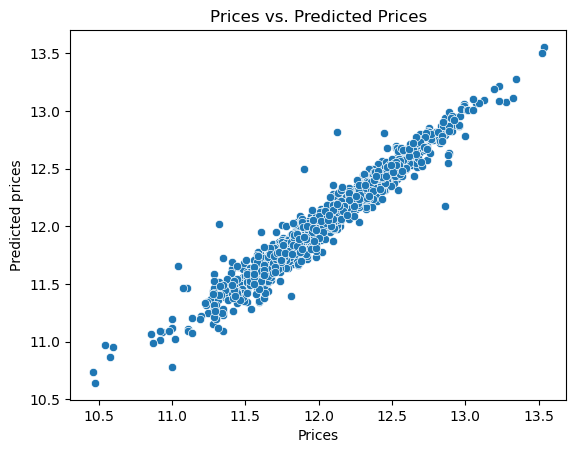

In [118]:
sns.scatterplot(x=y_train,y=y_train_pred )
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

Text(0, 0.5, 'Residuals')

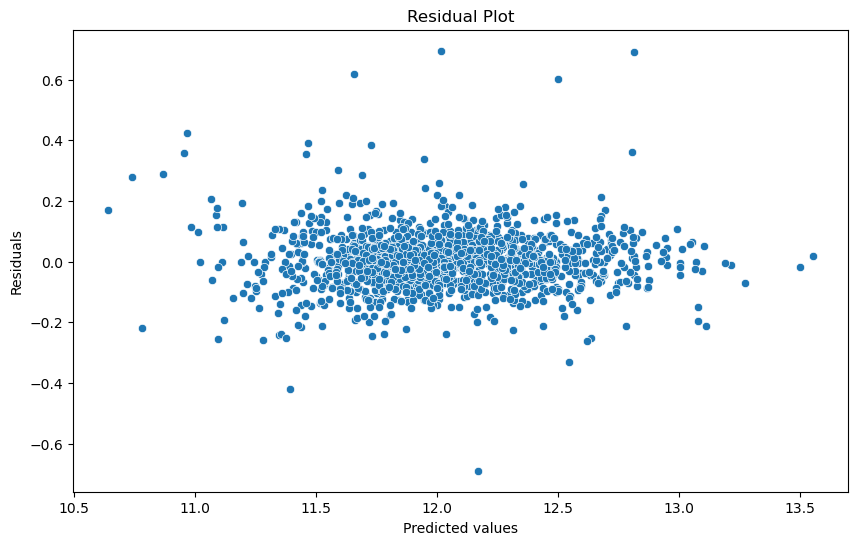

In [119]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

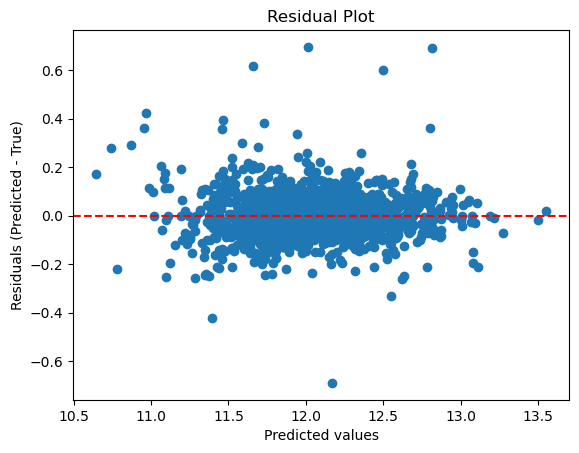

In [120]:
import matplotlib.pyplot as plt

x = y_train_pred
y = y_train_pred - y_train

plt.scatter(x, y)
plt.axhline(0, color='red', linestyle='--')  # خط عند الصفر
plt.xlabel("Predicted values")
plt.ylabel("Residuals (Predicted - True)")
plt.title("Residual Plot")
plt.show()

In [121]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

LASSO (Least Absolute Shrinkage and Selection Operator) هو نوع من الانحدار الخطي مع تنظيم L1.

هو نسخة محسّنة من Linear Regression.

يضيف عقوبة (Penalty) على مجموع القيم المطلقة للمعاملات (coefficients) لمنع overfitting.

يساعد على اختيار المتغيرات المهمة عن طريق جعل بعض المعاملات تساوي صفر.

In [122]:
lass_model=make_pipeline(RobustScaler(),LassoCV(alphas=[0.001,0.01,0.1,1], cv=10, random_state=0))
lass_model.fit(X_train,y_train)
y_train_pred=lass_model.predict(X_train)
mse_train=np.mean( np.mean((y_train_pred - y_train)**2))
print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for LASSO: {:.3f}".format(rmse(lass_model)))

Mean Squared Error = 0.00861138
RMSE score for LASSO: 0.135


Text(0.5, 1.0, 'Prices vs. Predicted Prices')

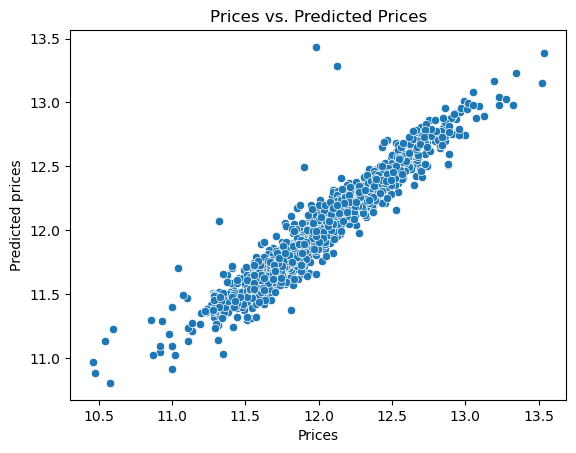

In [123]:
sns.scatterplot(x=y_train,y=y_train_pred )
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")

In [124]:
import  xgboost as xgb

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
xgbreg =xgb.XGBRegressor(seed=0)
param_grid = {
    'n_estimators': [100, 200, 300],      # عدد الأشجار
    'learning_rate': [0.01, 0.1, 0.2],   # معدل التعلم
    'max_depth': [3, 5, 7],              # عمق الشجرة
    'subsample': [0.8, 1],               # نسبة العينات المستخدمة
    'colsample_bytree': [0.8, 1] }        # نسبة الخصائص المستخدمة
xgb_model=GridSearchCV(estimator=xgbreg ,param_grid=param_grid, n_jobs=-1, cv=10)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print('\n\nBest Parameters: {}'.format(xgb_model.best_params_))
print("Mean Squared Error = {:.8f}".format(MSE_train))
##print("RMSE score for XGB: {:.3f}".format(rmse(xgb_model)))



Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error = 0.00329374


In [127]:
en_model= ElasticNetCV(alphas = [0.0001, 0.0003, 0.0004, 0.0006], 
                        l1_ratio = [.9, .92], 
           
                       random_state = 0,
                        cv=10)
en_model.fit(X_train, y_train)

y_train_pred = en_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

In [128]:
print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for ElasticNet: {:.3f}".format(rmse(en_model)))

Mean Squared Error = 0.01170008
RMSE score for ElasticNet: 0.136


In [129]:
import lightgbm as lgb

In [130]:
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=800,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb_model.fit(X_train, y_train)

y_train_pred = lgb_model.predict(X_train)
MSE_train = np.mean((y_train_pred - y_train)**2)

print("Mean Squared Error = {:.8f}".format(MSE_train))
print("RMSE score for LGBMRegressor: {:.4f}".format(rmse(lgb_model)))


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_wei

In [131]:
# Correct import for mlxtend
from mlxtend.regressor import StackingCVRegressor

In [132]:

from sklearn.pipeline import make_pipeline


In [133]:
lasso_model = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=10000, alphas = [0.0005],
                              random_state = 42, cv=5))


elasticnet_model = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=10000, alphas=[0.0005], 
                                        cv=5, l1_ratio=0.9))

                    

xgboost_model = make_pipeline(RobustScaler(),
                        xgb.XGBRegressor(learning_rate = 0.01, n_estimators=3400, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:linear',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006))
lgbm_model = make_pipeline(RobustScaler(),
                        lgb.LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=800,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.23,
                                      feature_fraction_seed = 9, bagging_seed=9,
                                      min_data_in_leaf = 6, 
                                      min_sum_hessian_in_leaf = 11))


In [135]:
    from sklearn.ensemble import StackingRegressor
    
    stack_sklearn = StackingRegressor(
        estimators=[
            ('lasso', lasso_model),
            ('elasticnet', elasticnet_model),
            ('xgboost', xgboost_model),
            ('lgbm', lgbm_model)
        ],
        final_estimator=xgboost_model,
        passthrough=True,
      cv=5  
    )

stack_model=stack_sklearn.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightG

In [144]:
en_preds=en_model.predict(X_test)

In [145]:
stack_gen_preds = stack_model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [146]:
lgbm_preds = lgb_model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [154]:
stack_gen_preds = np.expm1(stack_gen_preds)

In [155]:
predictions=pd.DataFrame(stack_gen_preds ,index=X_test.index+1,columns=['SalePrice']) 

In [156]:
predictions.index.name='Id'

In [157]:
predictions.to_csv("submission.csv")

In [159]:
predictions.head()

,SalePrice
Id,
1461,123414.546875
1462,167236.484375
1463,183729.156250
1464,195155.984375
1465,186091.093750


In [160]:
import joblib

# تدريب الموديل
model = xgb.XGBRegressor().fit(X_train, y_train)

# حفظه كملف
joblib.dump(model, "my_model.pkl")

['my_model.pkl']